In [69]:
# https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57
# Replaced any IBU above 120 with 120 based on this article https://www.thebrewenthusiast.com/ibus/
# Replaced any OG over 1.075 with 2 https://www.craftbeer.com/craft-beer-muses/high-gravity-beer-big-risk-bigger-reward

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from Util import loadBeer,loadWine
import matplotlib.pyplot as plt
from pandas.tools.plotting import table
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import time
from mpl_toolkits.mplot3d import axes3d, Axes3D
from sklearn.metrics import  silhouette_score

In [46]:
X_train, X_test, y_train, y_test= loadBeer(filePath='./data/recipeData.csv')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\Dan\Documents\notebooks\MachineLearning\assignment3\ML-Assignment3\dpolenik3\Util.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X_train['SugarScale'] = encoder.fit_transform(X_train['SugarScale']).astype(np.int32)


In [30]:
X_train.head()

,OG,FG,ABV,IBU,Color,BoilSize,BoilTime,Efficiency,SugarScale,StyleID
BeerID,,,,,,,,,,
17868,1.056,1.014,5.50,36.33,3.86,26.50,90,70.0,1,78
53672,1.063,1.016,6.13,5.00,37.86,28.39,60,35.0,1,9
56239,1.051,1.010,5.39,47.50,6.42,30.00,60,68.0,1,10
5891,1.063,1.018,6.00,84.60,12.69,10.60,60,70.0,1,10
9124,1.069,1.014,7.19,50.26,50.00,28.39,60,70.0,1,19


In [73]:
scores =[]
timeTaken=[]
models=[]
for k in range(1,30):
    kmeans = KMeans(n_clusters=k, random_state=0)
    start = time.time()
    scores.append(kmeans.fit(X_train).score(X_train))    
    end = time.time()
    totalTime = end -start
    if k % 5 == 0:
        print("Training k = "+str(k)+" clusters...")
    timeTaken.append(totalTime)
    models.append(kmeans)


Training k = 5 clusters...
Training k = 10 clusters...
Training k = 15 clusters...
Training k = 20 clusters...
Training k = 25 clusters...


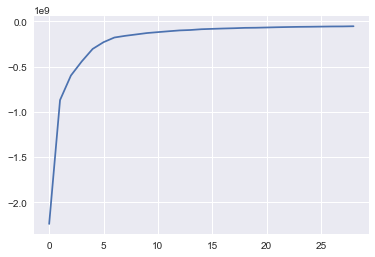

In [74]:
plt.plot(scores, label="score")

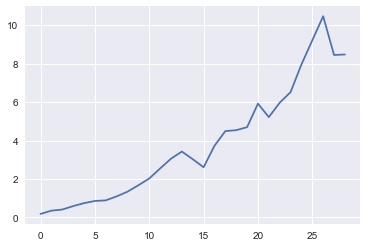

In [75]:
plt.plot(timeTaken, label="Training Time")

In [72]:
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X_train)
y_kmeans = kmeans.predict(X_train)
X_train.head()

,OG,FG,ABV,IBU,Color,BoilSize,BoilTime,Efficiency,SugarScale,StyleID
BeerID,,,,,,,,,,
17868,1.056,1.014,5.50,36.33,3.86,26.50,90,70.0,1,78
53672,1.063,1.016,6.13,5.00,37.86,28.39,60,35.0,1,9
56239,1.051,1.010,5.39,47.50,6.42,30.00,60,68.0,1,10
5891,1.063,1.018,6.00,84.60,12.69,10.60,60,70.0,1,10
9124,1.069,1.014,7.19,50.26,50.00,28.39,60,70.0,1,19


In [66]:
centroids = kmeans.cluster_centers_
centroids = pd.DataFrame(centroids,columns=['OG','FG','ABV','IBU','Color','BoilSize','BoilTime','Efficiency','SugarScale','StyleID'])
centroids.to_html('beerClusters.html')

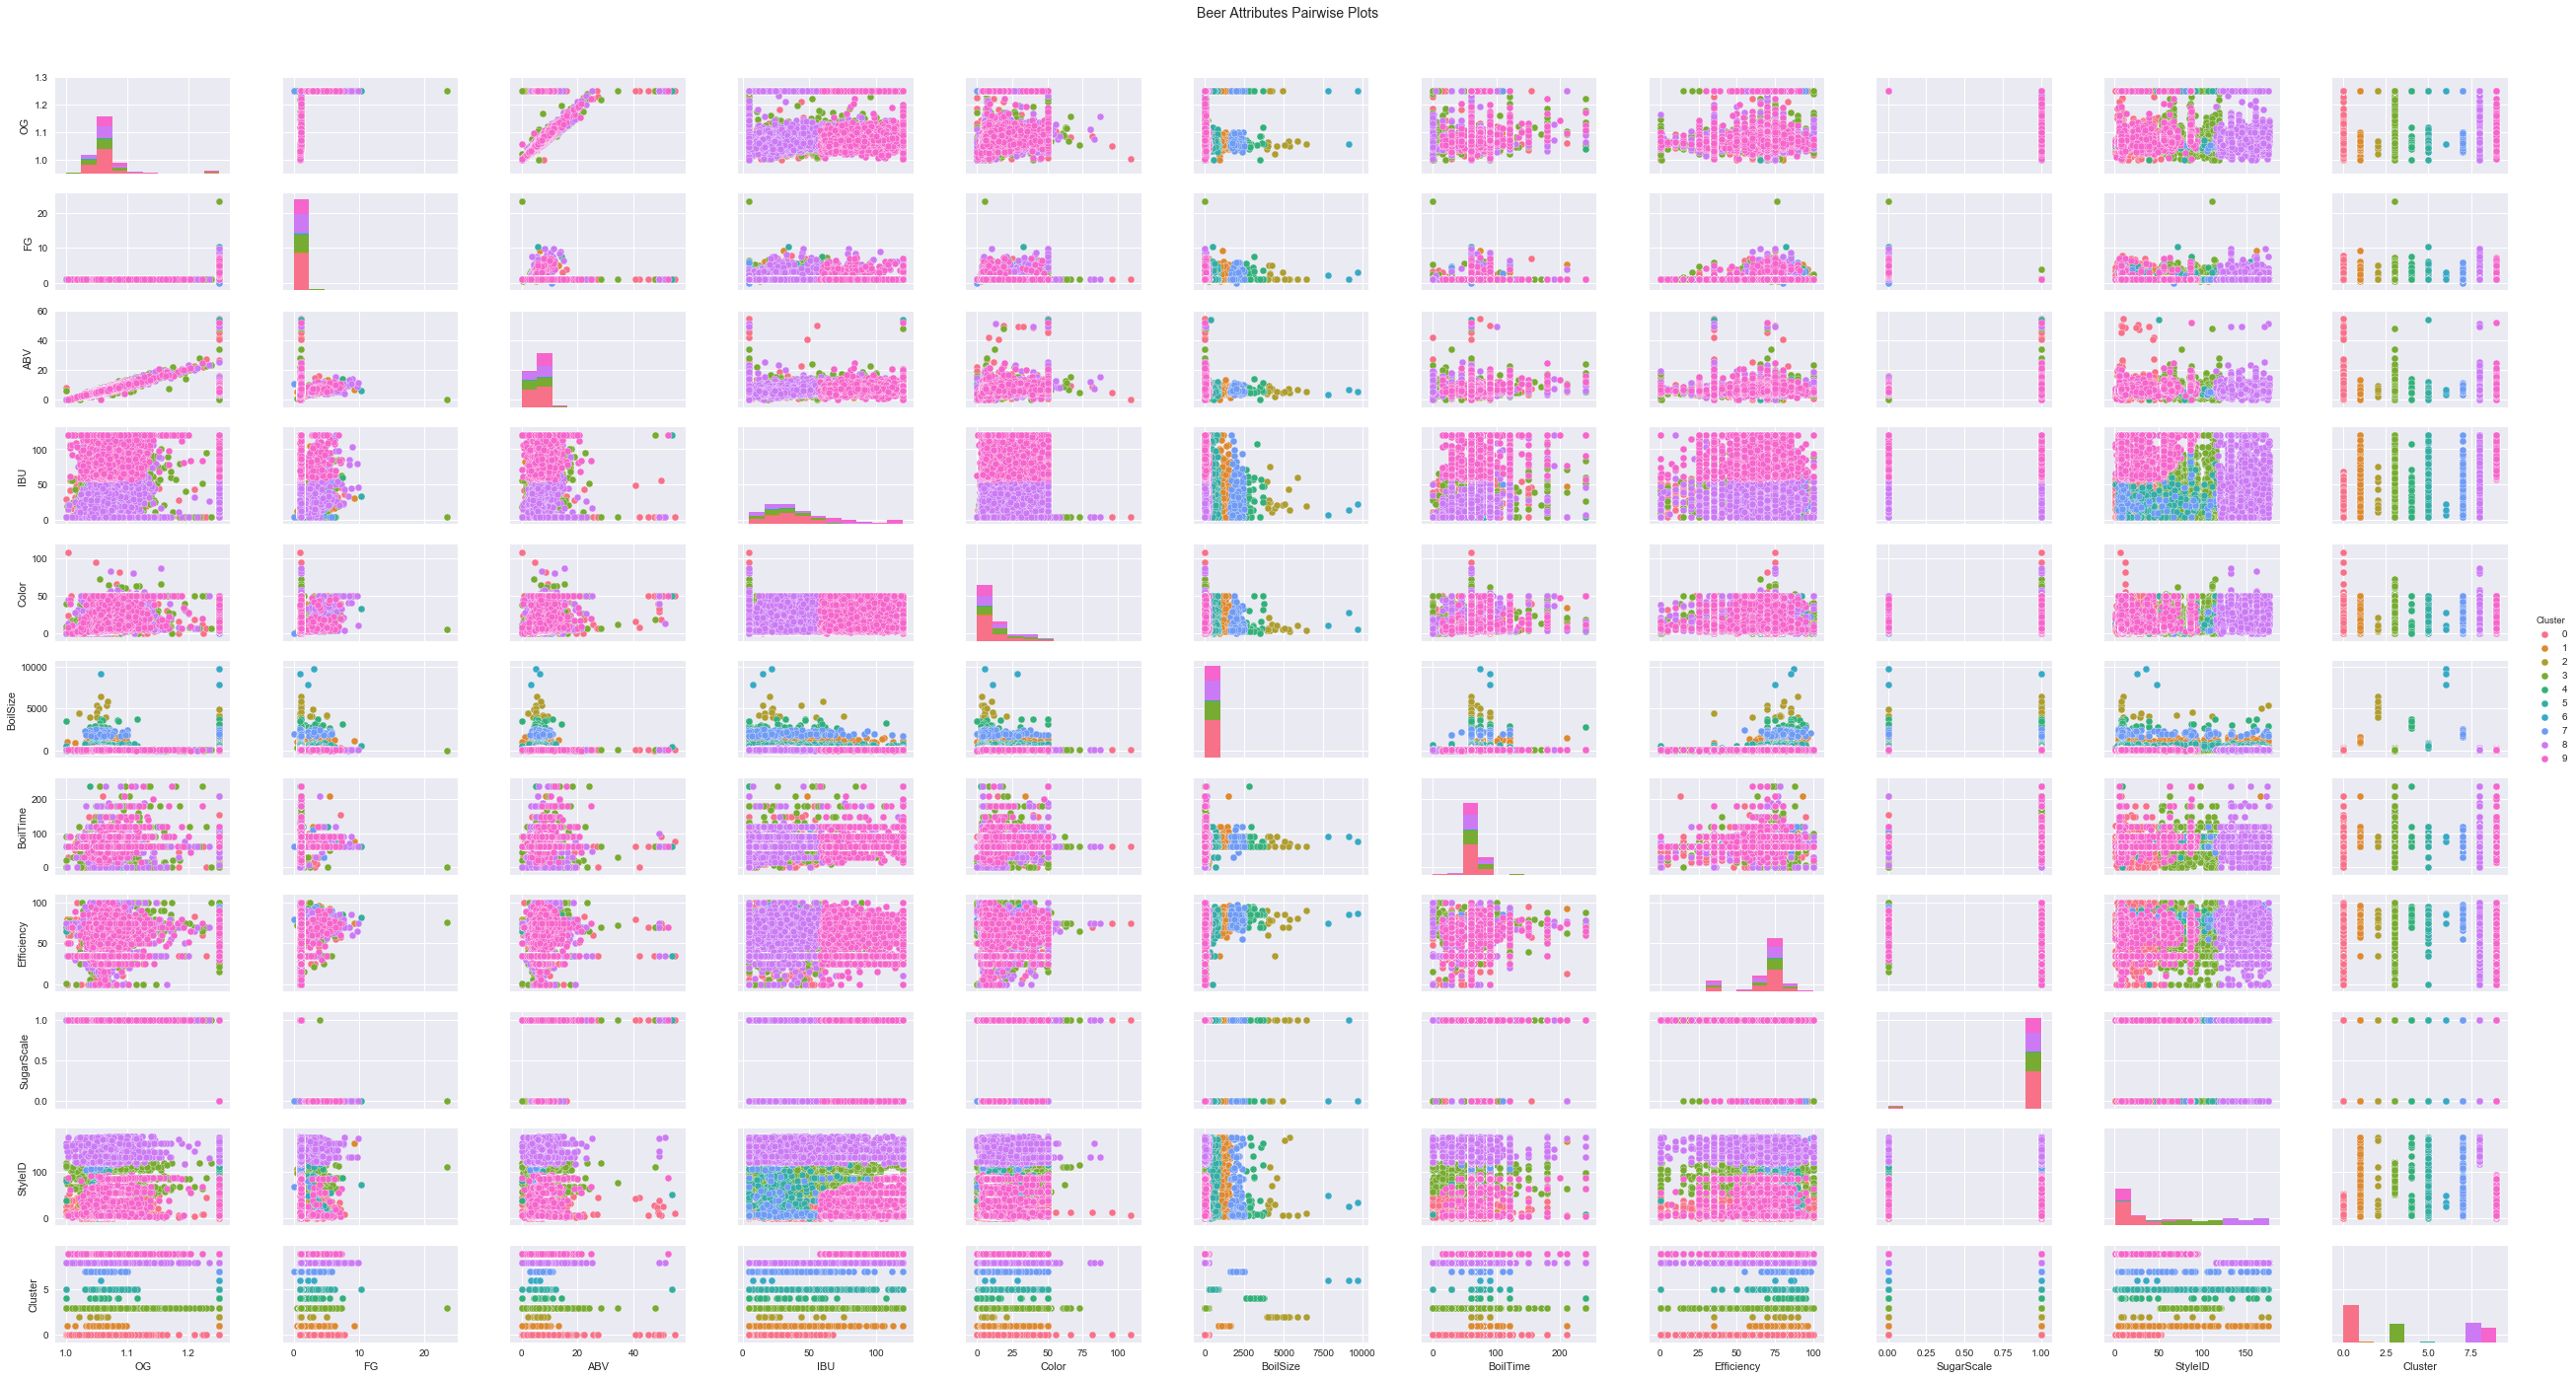

In [50]:
X_train_copy=X_train.copy()
X_train_copy['Cluster'] =y_kmeans
pp = sns.pairplot(X_train_copy, hue='Cluster', size=1.8, aspect=1.8)
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Beer Attributes Pairwise Plots', fontsize=14)

# Wine

In [89]:
X_train, X_test, y_train, y_test= loadWine(filePath='./data/winequality-red.csv')

In [90]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1569,6.2,0.51,0.14,1.9,0.056,15.0,34.0,0.99396,3.48,0.57,11.5
148,6.9,0.49,0.10,2.3,0.074,12.0,30.0,0.99590,3.42,0.58,10.2
570,11.5,0.35,0.49,3.3,0.070,10.0,37.0,1.00030,3.32,0.91,11.0
737,8.2,0.59,0.00,2.5,0.093,19.0,58.0,1.00020,3.50,0.65,9.3
565,12.7,0.60,0.49,2.8,0.075,5.0,19.0,0.99940,3.14,0.57,11.4


In [78]:
scores =[]
timeTaken=[]
for k in range(1,40):
    kmeans = KMeans(n_clusters=k, random_state=0)
    start = time.time()
    scores.append(kmeans.fit(X_train).score(X_train))    
    end = time.time()
    totalTime = end -start
    if k % 5 == 0:
        print("Training k = "+str(k)+" clusters...")
    timeTaken.append(totalTime)


Training k = 5 clusters...
Training k = 10 clusters...
Training k = 15 clusters...
Training k = 20 clusters...
Training k = 25 clusters...
Training k = 30 clusters...
Training k = 35 clusters...


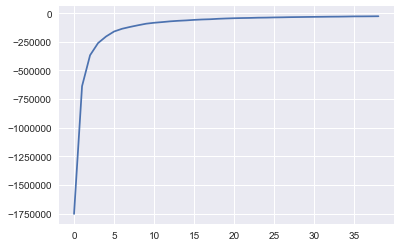

In [79]:
plt.plot(scores, label="score")

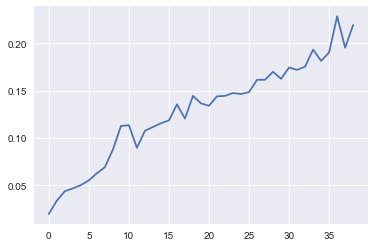

In [91]:
plt.plot(timeTaken, label="Training Time")

In [92]:
kmeans = KMeans(n_clusters=8, random_state=0)
kmeans.fit(X_train)
y_kmeans = kmeans.predict(X_train)

Text(0.5,0,'citric acid')

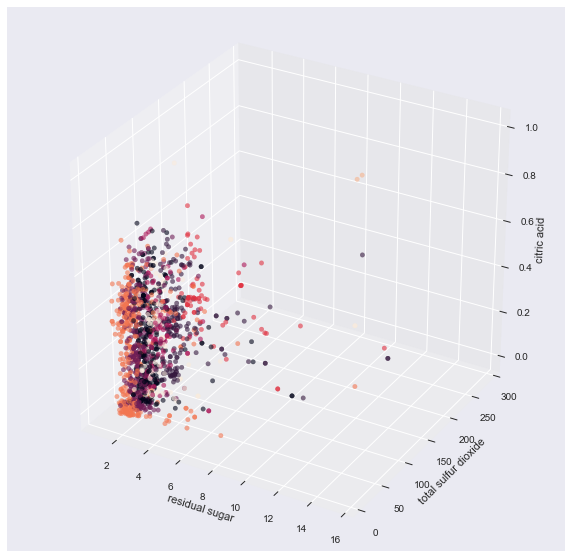

In [93]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ys = X_train[['total sulfur dioxide']].values.flatten()
xs = X_train[['residual sugar']].values.flatten()
zs = X_train[['citric acid']].values.flatten()

ax.scatter(xs, ys,zs,  alpha=0.6, c=y_kmeans)
ax.set_xlabel('residual sugar')
ax.set_ylabel('total sulfur dioxide')
ax.set_zlabel('citric acid')

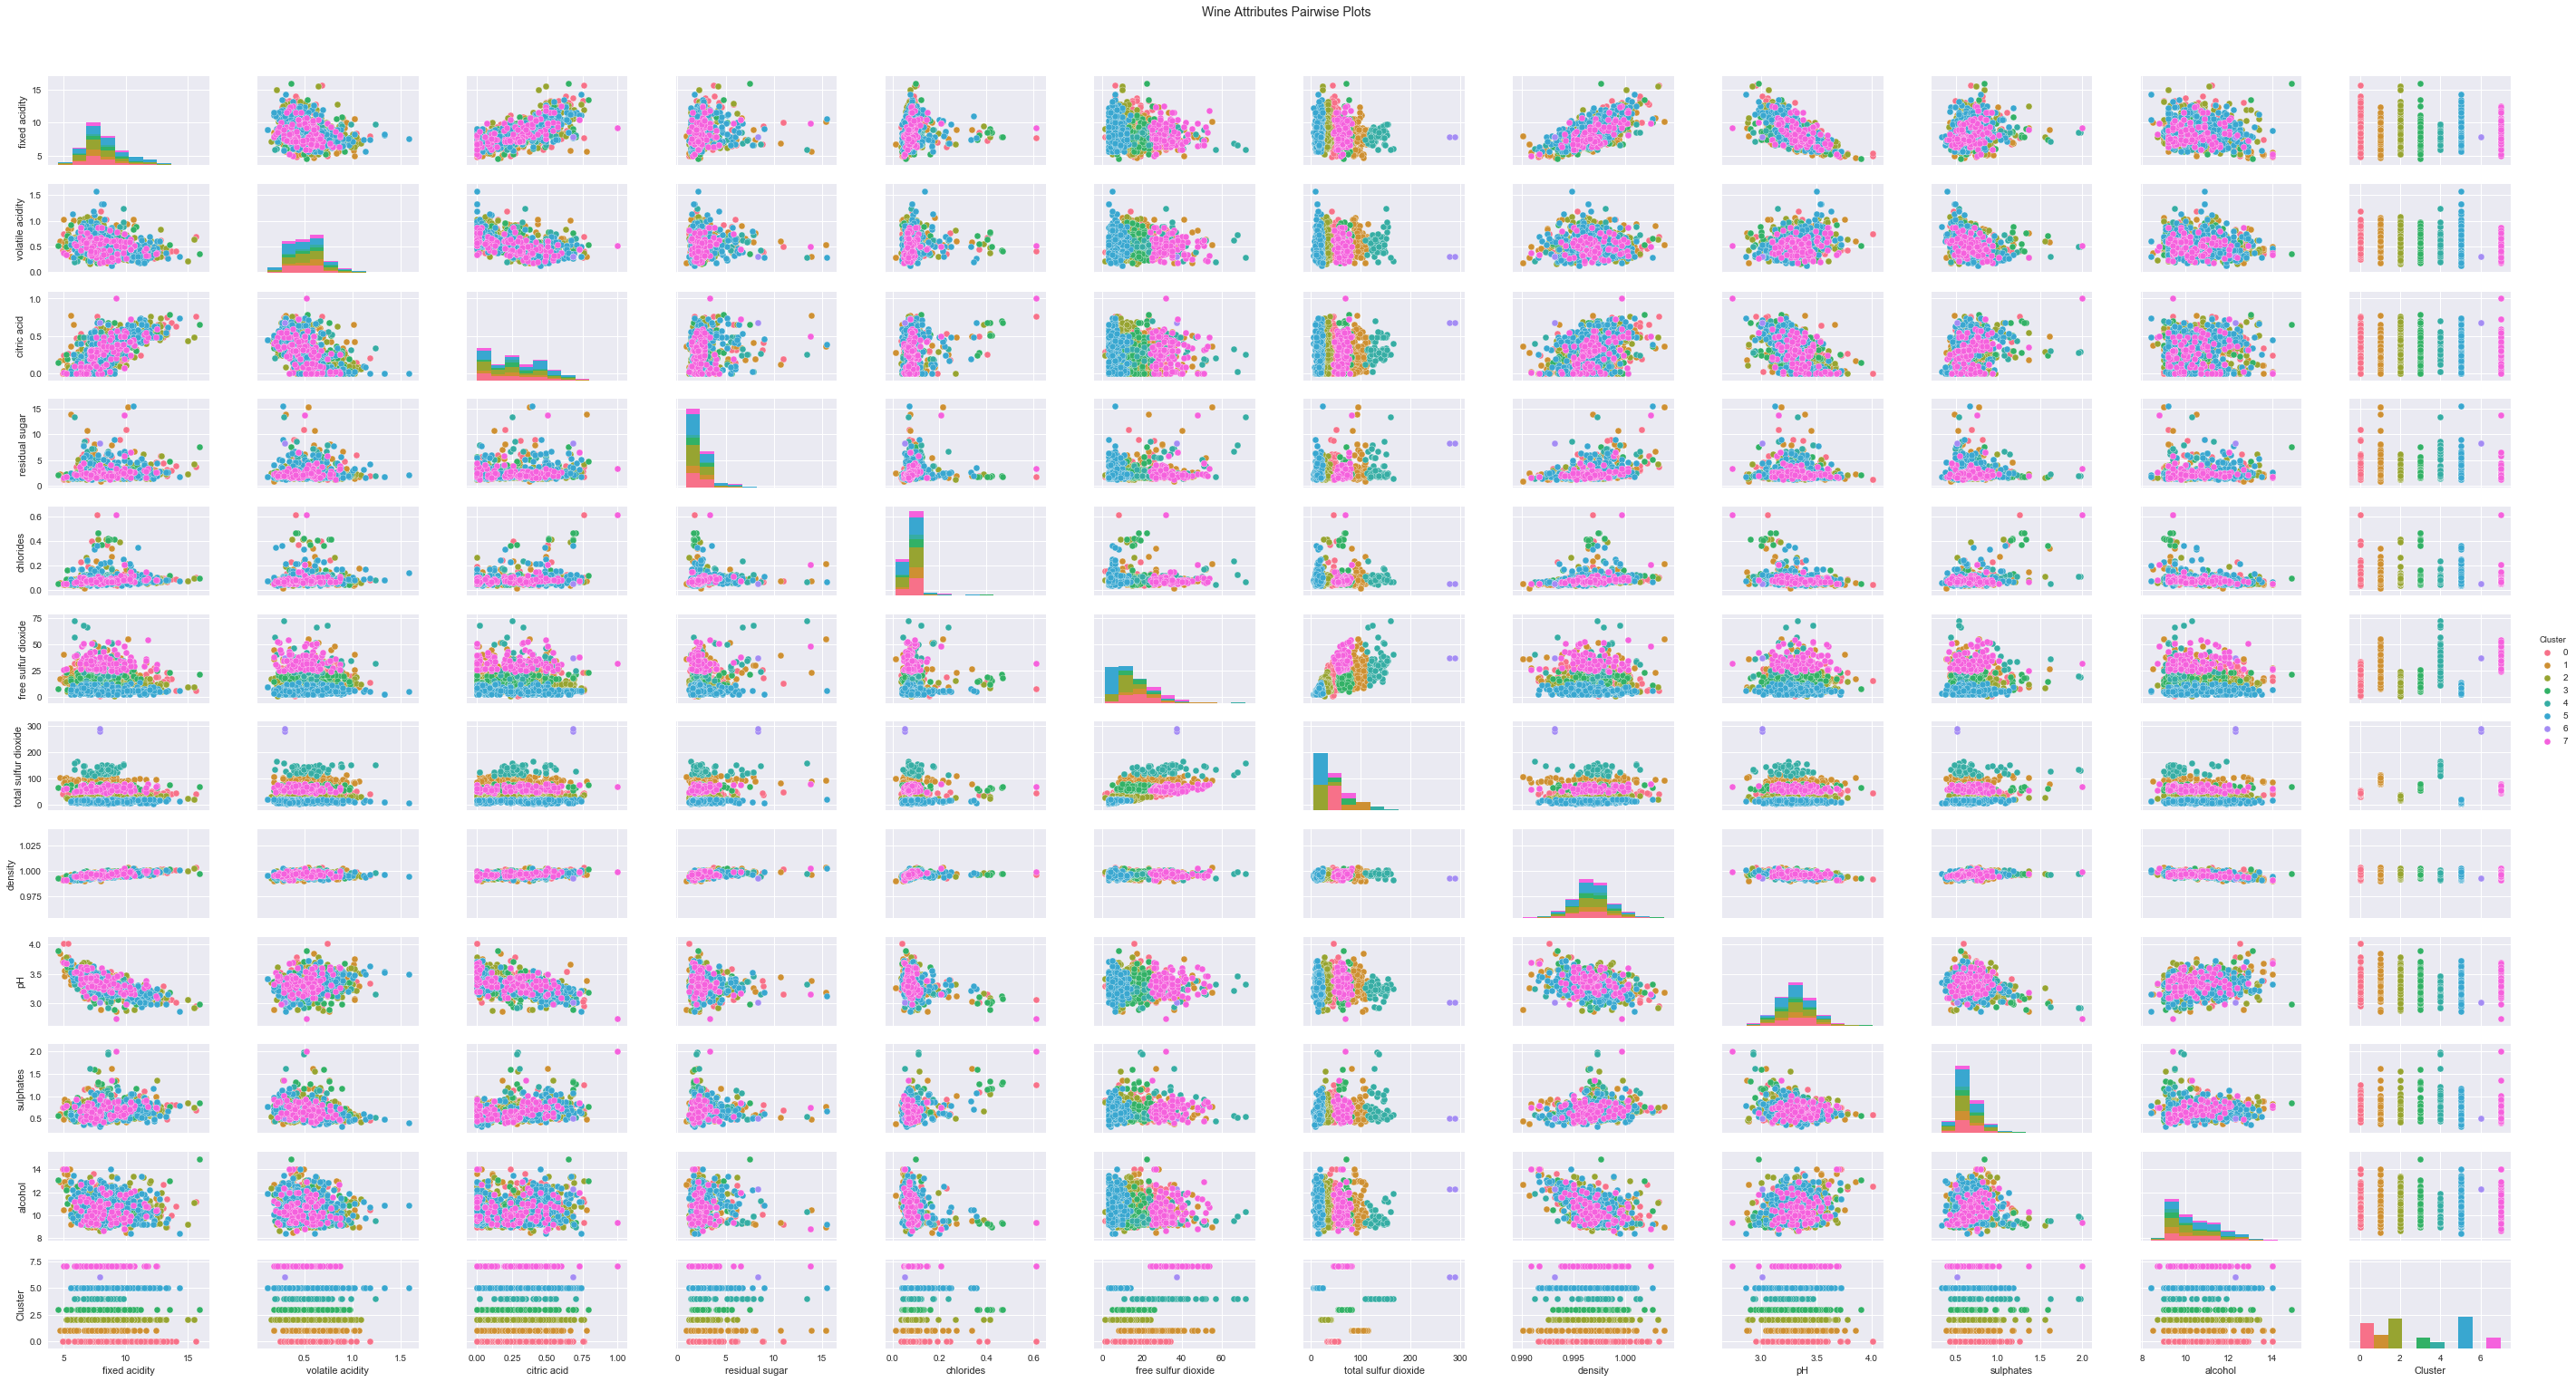

In [94]:
# Scatter Plot with Hue for visualizing data in 3-D
X_train_copy =X_train.copy()
X_train_copy['Cluster']=y_kmeans
pp = sns.pairplot(X_train_copy, hue='Cluster', size=1.8, aspect=1.8)
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

In [110]:
centroids = kmeans.cluster_centers_
centroids = pd.DataFrame(centroids,columns=list(X_train.columns.values))
centroids.to_html('wineClusters.html')

In [111]:
centroids

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,8.350177,0.515000,0.260883,2.502650,0.085696,17.973498,44.289753,0.996744,3.318551,0.666608,10.472261
1,7.782692,0.583846,0.249615,2.920513,0.089051,23.102564,95.000000,0.996816,3.314167,0.636282,10.086218
2,8.364392,0.529407,0.247122,2.220178,0.083030,11.522255,28.694362,0.996756,3.322908,0.652315,10.422453
3,8.167200,0.558400,0.281920,2.444800,0.108176,16.840000,65.704000,0.997044,3.300480,0.673440,10.057467
4,7.991176,0.568897,0.308088,3.325000,0.091206,31.977941,133.676471,0.997234,3.245000,0.718824,9.776471
5,8.673295,0.511974,0.300739,2.508807,0.085707,6.102273,15.105114,0.996532,3.295000,0.642102,10.740341
6,7.900000,0.300000,0.680000,8.300000,0.050000,37.500000,283.500000,0.993160,3.010000,0.510000,12.300000
7,8.238793,0.494181,0.264310,2.645690,0.085457,33.715517,62.844828,0.996868,3.348707,0.691466,10.454310
